In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "lemonade.csv"
df = pd.read_csv(url)

In [2]:
# sanity check 
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


---

### Functions:

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [3]:
def get_lower_and_upper_bounds(df, multiplier = 1.5):
    # set the quartile
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    # calculate the inter-quartile range
    iqr = q3 - q1
    
    # set lower and upperbound
    lower = q1 - (iqr * multiplier)
    upper = q3 + (iqr * multiplier)
    
    return lower, upper

---

## 1. Using `lemonade.csv` dataset and focusing on continuous variables:

## Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

- How many columns? 

In [4]:
# check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


##### Plot the numerical columns

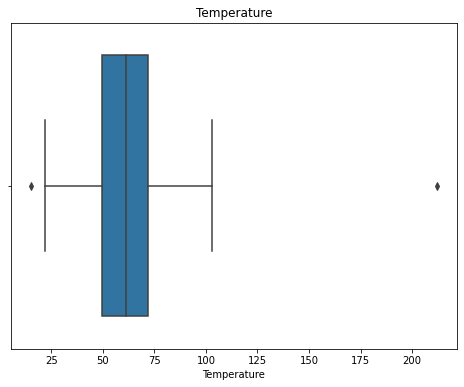

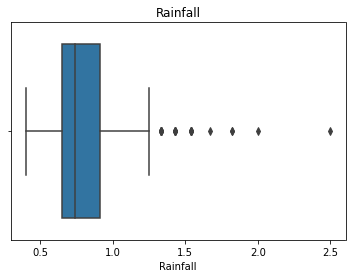

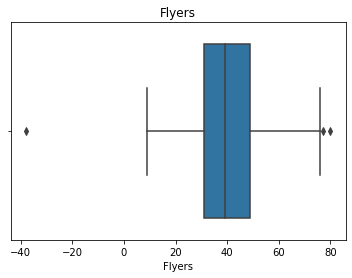

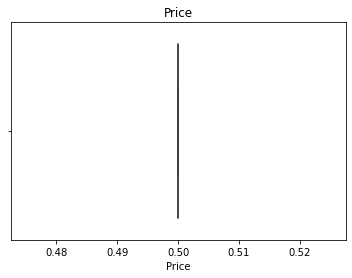

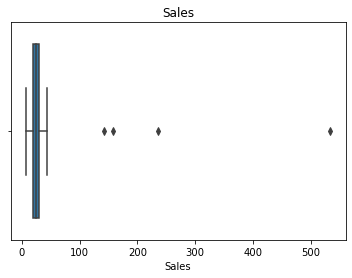

In [5]:
# plot columns to check for outliers
plt.figure(figsize=(8,6))

for cnt, col in enumerate(df.columns[2:7]):
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

In [6]:
# create a list of the numerical values
columns = df.columns[2:7].tolist()

##### Get the upper and lower bounds

In [7]:
# get upper and lower bounds for numerical columns
for col in columns:
    print(f'The {col} columns upper and lower bound values are: {get_lower_and_upper_bounds(df[col])}')

The Temperature columns upper and lower bound values are: (16.700000000000003, 104.7)
The Rainfall columns upper and lower bound values are: (0.26, 1.3)
The Flyers columns upper and lower bound values are: (4.0, 76.0)
The Price columns upper and lower bound values are: (0.5, 0.5)
The Sales columns upper and lower bound values are: (5.0, 45.0)


---

So I've observed the upper and lower bounds for each column. Next, I want to see where in the dataframe are values greater than the lower bound, or upper bound of each column.

Doing this will give me the ability to make a decision whether or not these are unacceptable or acceptable anomalies. 

### 1.5 IQR

### Temperature: Lower bound

In [8]:
# set bounds
temp_lower, temp_upper = get_lower_and_upper_bounds(df.Temperature)

In [9]:
# show dataframes
df[df.Temperature < temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


The lower bound range for Temperature was 16.7. There is an identified outlier of 15.1. 15.1 degrees doesn't seem to be abnormal so there shouldn't be an issue keeping this outlier. 

---

### Rainfall: Lower bound

In [10]:
# set bounds
rain_lower, rain_upper = get_lower_and_upper_bounds(df.Rainfall)

In [11]:
df[df.Rainfall < rain_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers for lower bound rainfall

---

### Flyers: Lower Bound

In [12]:
# set bounds
fly_lower, fly_upper = get_lower_and_upper_bounds(df.Flyers)

In [13]:
df[df.Flyers < fly_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


It's strange that there is a negative amount of flyers. To my knowledge, it's impossible to give or have a negative amount of a physical object, so I will remove this data from the dataframe. 

---

### Price: Lower Bound

In [14]:
price_l, price_u = get_lower_and_upper_bounds(df.Price)

In [15]:
df[df.Price < price_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers for price

---

### Sales: Lower Bound

In [16]:
sales_l, sales_u = get_lower_and_upper_bounds(df.Sales)

In [17]:
df[df.Sales < sales_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers for sales

---

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

### Temperature : Upper

In [18]:
df[df.Temperature > temp_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


This temperature is... wow. This will be removed. 

### Rainfall : Upper

In [19]:
df[df.Rainfall > rain_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


I don't think increased numbers of rainfall are impossible, so I would like to think that these are correct values. These I will keep. 

### Flyers : Upper

In [20]:
df[df.Flyers > fly_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


I will also keep these. You can give out 77 or 80 flyers in a day. 

### Price : Upper

In [21]:
df[df.Price > price_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No upper outliers for price.

### Sales : Upper

In [22]:
df[df.Sales > sales_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


All of these outliers are on 4th of july weekend that had hot temperature and low rainfall. These might be correct values due to events. 

---

## IQR 3

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [23]:
for col in columns:
    print(f'The {col} columns upper and lower bound values are: {get_lower_and_upper_bounds(df[col], multiplier=3)}')

The Temperature columns upper and lower bound values are: (-16.299999999999997, 137.7)
The Rainfall columns upper and lower bound values are: (-0.13, 1.69)
The Flyers columns upper and lower bound values are: (-23.0, 103.0)
The Price columns upper and lower bound values are: (0.5, 0.5)
The Sales columns upper and lower bound values are: (-10.0, 60.0)


In [24]:
temp_l, temp_u = get_lower_and_upper_bounds(df.Temperature, 3)

In [26]:
df[df.Temperature < temp_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No Outliers for Temperature Lower

---

In [27]:
rain_l, rain_u = get_lower_and_upper_bounds(df.Rainfall, 3)
df[df.Rainfall < rain_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

---

In [28]:
flyers_l, flyers_u = get_lower_and_upper_bounds(df.Flyers, 3)

In [29]:
df[df.Flyers < flyers_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Negative numbers which as mentioned before are not possible or do not seem to be possible. Will not keep

In [30]:
price_l, price_u = get_lower_and_upper_bounds(df.Price, 3)
df[df.Price < price_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

---

In [31]:
sales_l, sales_u = get_lower_and_upper_bounds(df.Sales, 3)

In [32]:
df[df.Sales < sales_l]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

---

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [34]:
df[df.Temperature > temp_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


People would die. Removed

In [35]:
df[df.Rainfall > rain_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


Doesnt seem to be out of the ordinary of potential rainfaill

In [38]:
df[df.Flyers > flyers_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

In [39]:
df[df.Price > price_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers

In [40]:
df[df.Sales > sales_u]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


All done on a holiday, in good weather. Could be possible due to the event. Will keep

---

#### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

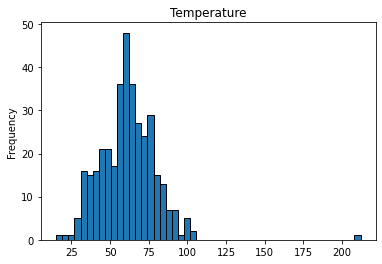

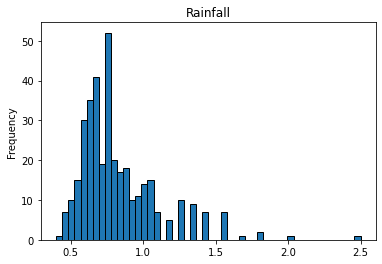

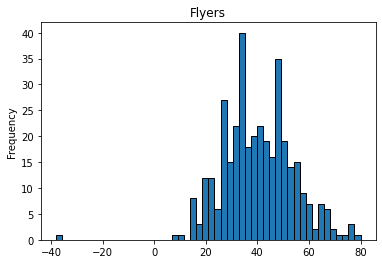

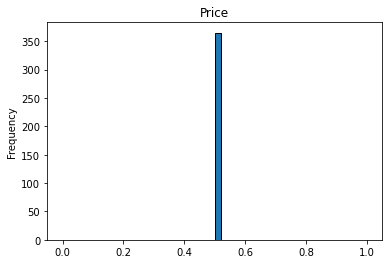

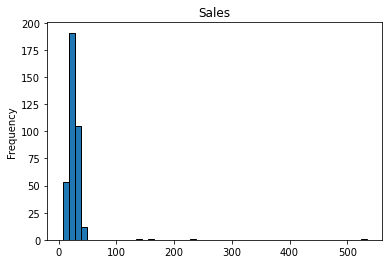

In [42]:
for col in df.columns[2:7]:
    df[col].plot.hist(ec='black', bins=50, title= col)
    plt.show()

Rainfall is close to being normally distributed but temperature and flyers are the only true normally distributed. 

In [43]:
# Calculate z scores for all numerical columns
df['temp_zscore'] = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()
df['rainfall_zscore'] = (df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std()
df['flyers_zscore'] = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()
df['sales_zscore'] = (df.Sales - df.Sales.mean()) / df.Sales.std()

#### Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

In [45]:
df[df['temp_zscore'].abs() > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rainfall_zscore,flyers_zscore,sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


212 temperature is still in the dataset and should be removed. Else everything else is perfectly normal.

In [46]:
df[df['flyers_zscore'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rainfall_zscore,flyers_zscore,sales_zscore
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499,0.295147
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709,0.424395
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569,0.295147
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964,0.230523
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020


Negative 38 is still kept, and should be removed. Else all else are perfectly normal.

---

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [47]:
df[df['temp_zscore'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rainfall_zscore,flyers_zscore,sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847


Remove

In [50]:
df[df['flyers_zscore'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rainfall_zscore,flyers_zscore,sales_zscore
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.254159


Remove.

### Takeaway: 
Sigma 3 seemed to give a direct identification for the outlier. Might be useful in isolating outliers. 